In [59]:
train_dir = 'C:\\Users\\Konrad\\Desktop\\facial-recognition-cnn\\deep-learning-face-recognition\\data\\train'
test_dir = 'C:\\Users\\Konrad\\Desktop\\facial-recognition-cnn\\deep-learning-face-recognition\\data\\test'

from keras.preprocessing.image import ImageDataGenerator

train_generator = ImageDataGenerator(
        rotation_range = 40,
        shear_range = 0.2,
        zoom_range = 0.2,
        horizontal_flip = True)

# No transformations are done on the testing images
test_generator = ImageDataGenerator()

print("Training set: ")
# Generating the Training Data
training_set = train_generator.flow_from_directory(
        train_dir,
        target_size=(64, 64),
        color_mode='grayscale',
        batch_size=16,
        class_mode='binary')

print("Test set: ")
# Generating the Testing Data
test_set = test_generator.flow_from_directory(
        test_dir,
        target_size=(64, 64),
        color_mode='grayscale',
        batch_size=16,
        class_mode='binary')

# Printing class labels for each face
test_set.class_indices

training_set.class_indices

for data_batch, labels_batch in training_set:
    print('Kształt danych wsadowych: ', data_batch.shape)
    print('Kształt danych wsadowych: ', labels_batch.shape)
    break

Training set: 
Found 111 images belonging to 16 classes.


Test set: 
Found 64 images belonging to 16 classes.
Kształt danych wsadowych:  (16, 64, 64, 1)
Kształt danych wsadowych:  (16,)


In [60]:

# class_indices have the numeric tag for each face
TrainClasses=training_set.class_indices
 
# Storing the face and the numeric tag for future reference
ResultMap={}
for faceValue,faceName in zip(TrainClasses.values(),TrainClasses.keys()):
    ResultMap[faceValue]=faceName
 
# Saving the face map for future referenc
 
# The model will give answer as a numeric tag
# This mapping will help to get the corresponding face name for it
print("Mapping of Face and its ID",ResultMap)
 
# The number of neurons for the output layer is equal to the number of faces
OutputNeurons=len(ResultMap)
print('\n The Number of output neurons: ', OutputNeurons)

Mapping of Face and its ID {0: 'konrad', 1: 'subject01', 2: 'subject02', 3: 'subject03', 4: 'subject04', 5: 'subject05', 6: 'subject06', 7: 'subject07', 8: 'subject08', 9: 'subject09', 10: 'subject10', 11: 'subject11', 12: 'subject12', 13: 'subject13', 14: 'subject14', 15: 'subject15'}

 The Number of output neurons:  16


In [61]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense
 

model= Sequential()
model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(150, 150, 1)))
model.add(MaxPool2D((2, 2)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
 
model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=["accuracy"])


# Starting the model training
history = model.fit(training_set,
                    steps_per_epoch=7,
                    epochs=20,
                    validation_data=test_set,
                    validation_steps=7)
 

Epoch 1/20
7/7 [==============================] - 2s 127ms/step - loss: -35442.3594 - accuracy: 0.0450 - val_loss: -174235.7188 - val_accuracy: 0.0625
Epoch 2/20
7/7 [==============================] - 0s 63ms/step - loss: -559977.3750 - accuracy: 0.0631
Epoch 3/20
7/7 [==============================] - 0s 64ms/step - loss: -3126094.5000 - accuracy: 0.0631
Epoch 4/20
7/7 [==============================] - 0s 62ms/step - loss: -11465936.0000 - accuracy: 0.0631
Epoch 5/20
7/7 [==============================] - 0s 60ms/step - loss: -34486888.0000 - accuracy: 0.0631
Epoch 6/20
7/7 [==============================] - 0s 61ms/step - loss: -81156240.0000 - accuracy: 0.0631
Epoch 7/20
7/7 [==============================] - 0s 64ms/step - loss: -170193408.0000 - accuracy: 0.0631
Epoch 8/20
7/7 [==============================] - 1s 72ms/step - loss: -333186464.0000 - accuracy: 0.0631
Epoch 9/20
7/7 [==============================] - 0s 64ms/step - loss: -585308480.0000 - accuracy: 0.0631
Epoch 10/

ValueError: x and y must have same first dimension, but have shapes (20,) and (1,)

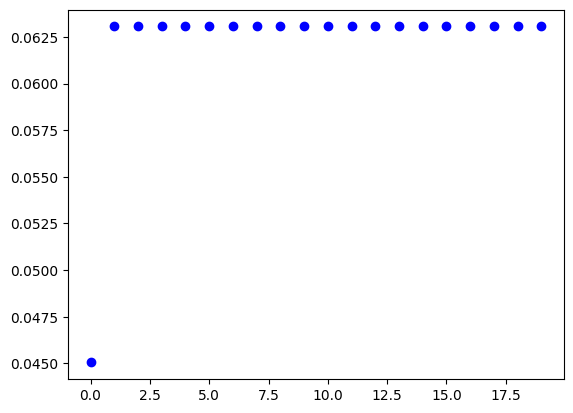

In [62]:
import matplotlib.pyplot as plt
# Accessing the metrics after training
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plotting the results
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Dokladnosc trenowania')
plt.plot(epochs, val_acc, 'b', label='Dokladnosc walidacji')
plt.title('Dokladnosc trenowania i walidacji')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Strata trenowania')
plt.plot(epochs, val_loss, 'b', label='Strata walidacji')
plt.title('Strata trenowania i walidacji')
plt.legend()
plt.show()

In [45]:
import numpy as np
from keras.preprocessing import image
 
ImagePath='C:\\Users\\Konrad\\Desktop\\facial-recognition-cnn\\deep-learning-face-recognition\\data\\test\\konrad\\konrad_1.jpg'
test_image=image.load_img(ImagePath,target_size=(64, 64))
test_image=image.img_to_array(test_image)
 
test_image=np.expand_dims(test_image,axis=0)
 
result=model.predict(test_image,verbose=0)
#print(training_set.class_indices)
 
print('####'*10)
print('Prediction is: ',ResultMap[np.argmax(result)])

########################################
Prediction is:  konrad
